In [128]:
import numpy as np
import matplotlib.pyplot as plt
from gll import gll
import pandas as pd

In [129]:
df = pd.read_csv('dat.csv')

In [130]:
arr=np.array(df.county.unique())
arr.size

1475

In [131]:
by_county=df.groupby('county')

In [132]:
lis=[]
for i in range(0,arr.size):
    df_1=by_county.get_group(arr[i])
    lis.append(df_1)

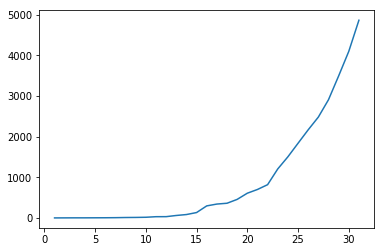

In [133]:
import matplotlib.pyplot as plt
dates=lis[35]['date']
deaths=lis[35]['deaths']
cases=lis[35]['cases']
plt.plot(np.arange(1,deaths.size+1,1),cases)

In [134]:
x=np.arange(1,deaths.size+1,1)

In [135]:
def lagrange(N, i, x, xi):
    """
    Function to calculate  Lagrange polynomial for order N
    and polynomial i [0, N] at location x at given collocation points xi
    (not necessarily the GLL-points)
    """
    fac = 1
    for j in range(-1, N):
        if j != i:
            fac = fac * ((x - xi[j + 1]) / (xi[i + 1] - xi[j + 1]))
    return fac

In [136]:
def f(theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8):
    f = theta0+theta1*x+theta2*(x**2)+theta3*(x**3)+theta4*(x**4)+theta5*(x**5)+theta6*(x**6)+theta7*(x**7)+theta8*(x**8)
    return f

In [137]:
func = f(  921.388,-31.969,-48.458,253.715,418.294,409.992,287.878,116.456,-54.042)

In [138]:
f = open('file1.txt', 'r')
Xpoly = f.readlines()
f.close()

In [139]:
Xpoly=np.array([float(i) for i in Xpoly])

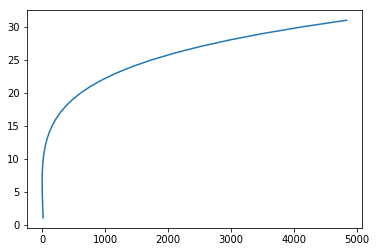

In [146]:
plt.plot(Xpoly,x)

In [141]:
f=func

In [147]:
# Give order of Lagrange polynomial
N = 10

# Get collocation points xi from gll routine (worth having a look)
[xi, w] = gll(N)
fi = np.interp(xi, x, f) 
  
# Initialize Lagrange polynomials on the defined grid
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange(N, j, x[i], xi)
        

In [148]:
s = x * 0
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
#
######################################################

# Calculate error of original and interpolated function
error = np.sum((np.abs(f - s))) / np.sum(np.abs(f)) * 100

In [149]:
error

93.34082952614325